In [5]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from craftroom import resample
# import stistools
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
from scipy.io.idl import readsav
from astropy.convolution import convolve_fft
from astropy.convolution import Gaussian1DKernel
from matplotlib.gridspec import GridSpec

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


How to make the 1A version. Scipi or craftroom? How to make the instruments combine at the ends.

In [6]:
data = fits.getdata('/media/david/1tb_storage1/emergency_data/mega_muscles/hlsp/2MASS-J23062928-0502285/components_v1/hlsp_muscles_multi_multi_trappist-1_broadband_v2_var-res-sed.fits',1)

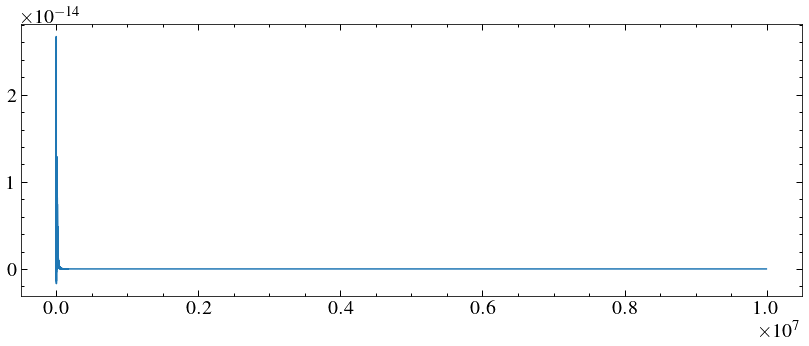

In [7]:
plt.plot(data['WAVELENGTH'],data['FLUX'])

In [8]:
#craftroom or scipy

In [9]:
w, f, e = data['WAVELENGTH'],data['FLUX'],data['ERROR']

In [10]:
from craftroom import resample

In [11]:
import math as mt

In [12]:
print(w[0],w[-1])

14.100000381469727 9995000.0


In [14]:
start, end= mt.ceil(w[0]), mt.floor(w[-1])
print(start,end)

15 9995000


In [15]:
neww = np.arange(start,end+1, 1)

In [19]:
f1 = interpolate.interp1d(w, f, fill_value='extrapolate')(neww)
w2, f2 = resample.bintogrid(w, f, newx=neww)

In [20]:
og = np.trapz(f,w)
sp = np.trapz(f1, neww)
np.trapz(f2,w2)

1.170614652905654e-10

1.1704866534688444e-10

1.1706070375192362e-10